# Shivam Rajput
# 210968104
# Week-6

# Exercise 2

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [107]:
df = pd.read_csv('amazon_baby.csv.zip')
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


## Q1. Check the number of the reviews received for each product. 

In [108]:
df.name.value_counts()

Vulli Sophie the Giraffe Teether                                                                                785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                                                             562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision                                        561
Baby Einstein Take Along Tunes                                                                                  547
Cloud b Twilight Constellation Night Light, Turtle                                                              520
                                                                                                               ... 
New Eco Friendly Resistant oilcloth Cotton Diaper Bag Baby Nappy Big Tote Bags,Cross Bag-Tote Type (Tote_06)      1
Hello Kitty Chalkboard ReStik Wall Sticker Set of 2                                                               1
Peg Perego Primo Viaggio SIP 30 30 Car Seat Kiwi with Easyview Ultimate 

## Q2. Check the products that have more than 15 reviews. 

In [109]:
df.name.value_counts().loc[lambda x : x > 15]

Vulli Sophie the Giraffe Teether                                            785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                         562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision    561
Baby Einstein Take Along Tunes                                              547
Cloud b Twilight Constellation Night Light, Turtle                          520
                                                                           ... 
Badger Basket Barrel Top Toy Box, Natural                                    16
Lil Joey 2 Pack All-In-One Cloth Diaper, Lux                                 16
Label Itz Bandette Cup and Bottle Labels, Zoo Animals                        16
Carters Keep Me Close Blanket, Ecru                                          16
Boppy Newborn Lounger                                                        16
Name: name, Length: 2339, dtype: int64

## Q3. Find any missing review are present or not, If present remove those data 

In [110]:
df.isnull().sum()
df = df[df.review.notna()]
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


## Q4. Clean the data and replace the contractions with their expansions. 

In [111]:
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [112]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
    
df['review'] = df['review'].apply(lambda x:cont_to_exp(x))


In [113]:
df['review']

0         These flannel wipes are OK, but in my opinion ...
1         it came early and was not disappointed. i love...
2         Very soft and comfortable and warmer than it l...
3         This is a product well worth the purchase.  I ...
4         All of my kids have cried non-stop when I trie...
                                ...                        
183526    Such a great idea! very handy to have and look...
183527    This product rocks!  It is a great blend of fu...
183528    This item looks great and cool for my kids.......
183529    I am extremely happy with this product. I have...
183530    I love this product very mush . I have bought ...
Name: review, Length: 182702, dtype: object

## Q5. Add the Polarity, length of the review, the word count and average word length of each review.  

In [114]:
from textblob import TextBlob

df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)


df['review_len'] = df['review'].apply(lambda x:len(x))

df['word_count'] = df['review'].apply(lambda x: len(x.split()))


def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words) 


df['avg_word_len'] = df['review'].apply(lambda x: get_avg_word_len(x))

## Q6. Visualize the distribution of the word count, review length, and polarity. 

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

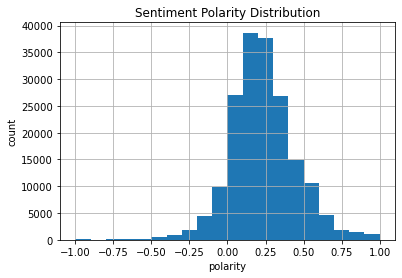

In [115]:
df['polarity'].hist(bins=20)
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('Sentiment Polarity Distribution')

## histogram for review length

Text(0.5, 1.0, 'Review Text Length Distribution')

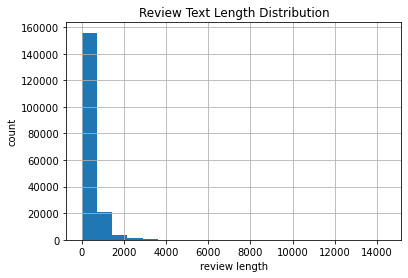

In [116]:

df['review_len'].hist(bins=20)
plt.xlabel('review length')
plt.ylabel('count')
plt.title('Review Text Length Distribution')


## histogram for word count 

Text(0.5, 1.0, 'Word Count Distribution')

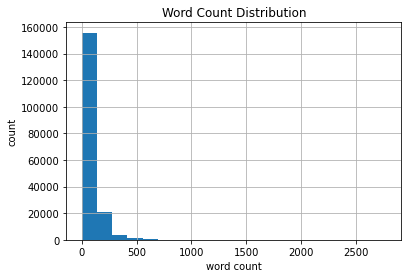

In [117]:

df['word_count'].hist(bins=20)
plt.xlabel('word count')
plt.ylabel('count')
plt.title('Word Count Distribution')

## Q7. Visualize polarity considering the rating.

Text(0.5, 1.0, 'Polarity considering Rating')

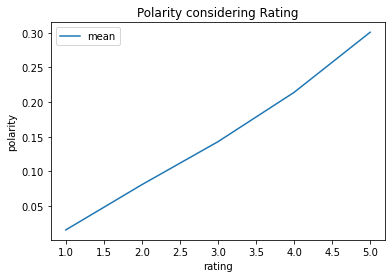

In [118]:
df.groupby(by='rating').polarity.agg([np.mean]).plot()
plt.xlabel('rating')
plt.ylabel('polarity')
plt.title('Polarity considering Rating')

## Q8. Visualize the count of the reviews of each rating available in the dataset. 

Text(0.5, 1.0, 'count of the reviews of each rating')

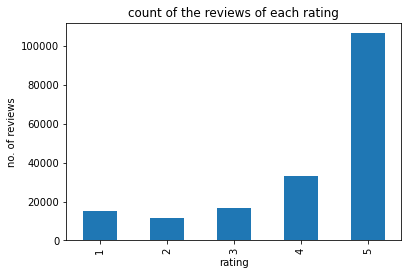

In [119]:
df.groupby(by='rating').review.count().plot.bar()
plt.xlabel('rating')
plt.ylabel('no. of reviews')
plt.title('count of the reviews of each rating')

## Q9. List the Top 20 products based on the polarity 

In [120]:
df.sort_values(by='polarity', ascending=False)[0:20]

,name,review,rating,polarity,review_len,word_count,avg_word_len
121032,"BOB Ironman Duallie Stroller, Yellow",Best one out there for running with 2 kids. My...,5,1.0,116,24,3.875000
152316,God Bless Plush Lamb Wubbanub Pacifier by Mary...,Great Pacifiers!,5,1.0,16,2,7.500000
8060,"HALO SleepSack Micro-Fleece Wearable Blanket, ...",My 1yo daughter has to wear a hip abduction br...,5,1.0,121,22,4.545455
177173,"Angel Dear Blankie, Blue Giraffe",These make excellent shower gifts. My daughte...,5,1.0,130,24,4.416667
75438,Lambs &amp; Ivy Bedtime Originals Hello Kitty ...,My granddaughter's room is done in hello kitty...,5,1.0,118,21,4.571429
162222,MAM Eco 2+ Orthodonic Pacifiers 3 Ct.,These are always the best. My daughter does no...,5,1.0,112,21,4.380952
181853,"Graco Size4Me 65 Convertible Car Seat, Pierce",Awesome car seat. Fits well in my four runner ...,5,1.0,67,13,4.230769
21341,Summer Infant Gentle Vibrations Massager And T...,Great toothbrush! Helps my son with his feedin...,5,1.0,111,20,4.600000
2366,Prince Lionheart Table Edge Guard with 4 Corne...,Perfect choice to protect my grandsons face!!!...,5,1.0,115,21,4.523810
182810,Chummie Potty Training Ladder Step Up Seat,THEE BEST EVER,5,1.0,14,3,4.000000


## Q10. Visualize to check whether the review length changes with rating. 

Text(0.5, 1.0, 'Review Length vs Rating')

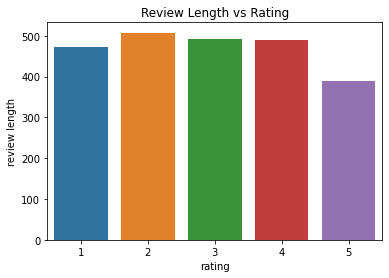

In [121]:
sns.barplot(x='rating', y='review_len', data=df, ci=None)
plt.xlabel('rating')
plt.ylabel('review length')
plt.title('Review Length vs Rating')

## Q11. Visualize the distribution of Top 25 Unigram, Bigram and Trigram. 

In [122]:
def get_top_n_words(x, n=25):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Text(0.5, 1.0, 'Unigrams Count')

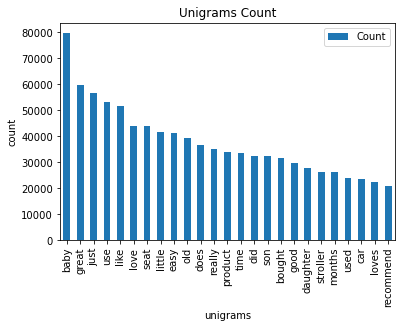

In [123]:
common_words = get_top_n_words(df['review'], 25)
common_words
df1 = pd.DataFrame(common_words, columns = ['Unigram Text' , 'Count'])

df1.set_index('Unigram Text', drop=True, inplace=True)
df1.plot.bar()
plt.xlabel('unigrams')
plt.ylabel('count')
plt.title('Unigrams Count')

In [124]:

def get_top_n_bigram(x, n=25):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_bigram(df['review'], 25)
common_words
df1 = pd.DataFrame(common_words, columns = ['Bigram Text' , 'Count'])

df1.set_index('Bigram Text', drop=True, inplace=True)
df1.plot.bar()
plt.xlabel('bigrams')
plt.ylabel('count')
plt.title('BIgrams Count')

In [ ]:
def get_top_n_trigram(x, n=25):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words="english").fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_trigram(df['review'], 25)
common_words
df1 = pd.DataFrame(common_words, columns = ['Trigram Text' , 'Count'])

df1.set_index('Trigram Text', drop=True, inplace=True)
df1.plot.bar()
plt.xlabel('trigrams')
plt.ylabel('count')
plt.title('Trigrams Count')